<a href="https://colab.research.google.com/github/Saqlain2/Hepatitis-Mortality-Prediction-with-ML/blob/main/Hepatitis_Mortality_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("hepatitis.data")

In [ ]:
df

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


Class: DIE, LIVE

AGE: 10, 20, 30, 40, 50, 60, 70, 80

SEX: male, female

STEROID: no, yes

ANTIVIRALS: no, yes

FATIGUE: no, yes

MALAISE: no, yes

ANOREXIA: no, yes

LIVER BIG: no, yes

LIVER FIRM: no, yes

SPLEEN PALPABLE: no, yes

SPIDERS: no, yes

ASCITES: no, yes

VARICES: no, yes

BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00

ALK PHOSPHATE: 33, 80, 120, 160, 200, 250


SGOT: 13, 100, 200, 300, 400, 500,

ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0

PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90

HISTOLOGY: no, yes

In [ ]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [ ]:
df = pd.read_csv("hepatitis.data",names=col_names)

In [ ]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
df.dtypes

Class               int64
AGE                 int64
SEX                 int64
STEROID            object
ANTIVIRALS          int64
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER BIG          object
LIVER FIRM         object
SPLEEN PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY           int64
dtype: object

In [ ]:
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')


In [ ]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [ ]:
df = df.replace('?',0)

In [ ]:
sum(df.dtypes=='object')

15

In [ ]:
df.columns[df.dtypes=='object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [ ]:
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot',  'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [ ]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [ ]:
df[['albumin','bilirubin']] = df[['albumin','bilirubin']].astype(float)

In [ ]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [ ]:
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

# **EDA**

In [ ]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
target_label = {'Die': 1,'Live':2}

In [ ]:
df["class"].value_counts()

2    123
1     32
Name: class, dtype: int64

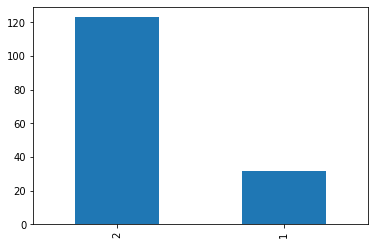

In [ ]:
df["class"].value_counts().plot(kind='bar')

In [ ]:
df['sex'].unique()

array([2, 1])

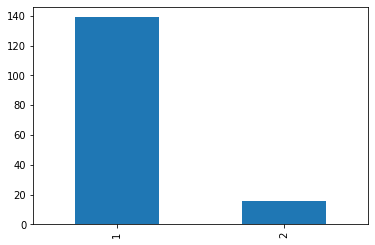

In [ ]:
df["sex"].value_counts().plot(kind='bar')

In [ ]:
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

In [ ]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [ ]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [ ]:
freq_df = freq_df.reset_index(name='count')

In [ ]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


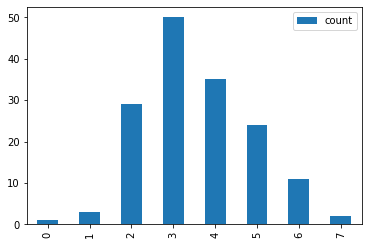

In [ ]:
freq_df.plot(kind='bar')

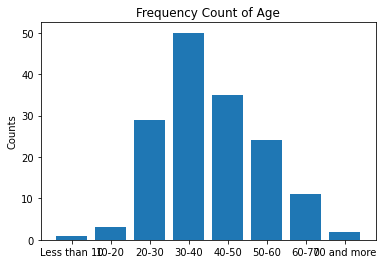

In [ ]:
# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

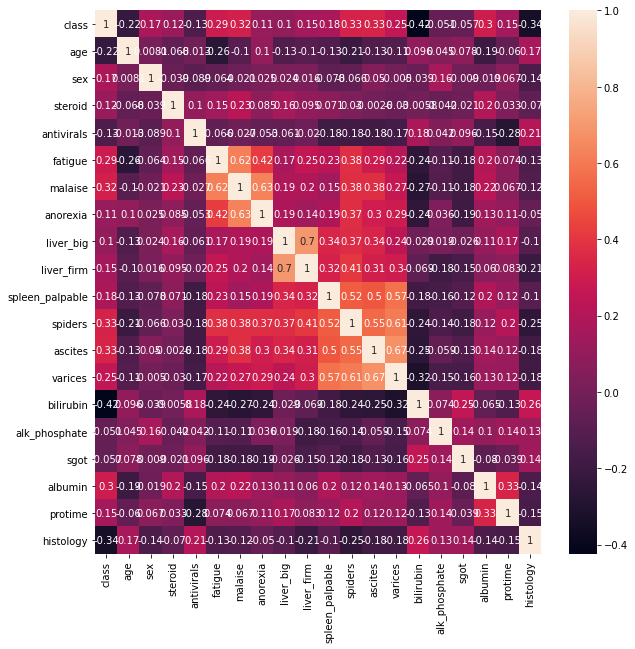

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df.isnull().any()

class              False
age                False
sex                False
steroid            False
antivirals         False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
bilirubin          False
alk_phosphate      False
sgot               False
albumin            False
protime            False
histology          False
dtype: bool

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


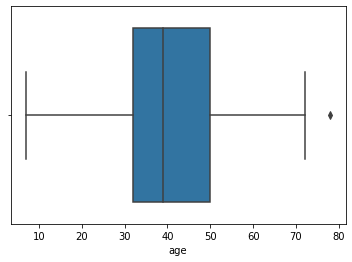

In [ ]:
sns.boxplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


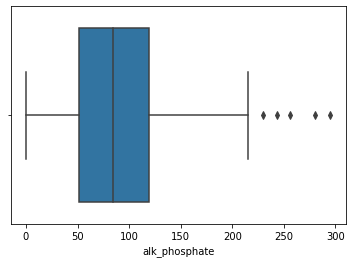

In [ ]:
sns.boxplot(df['alk_phosphate'])

In [ ]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


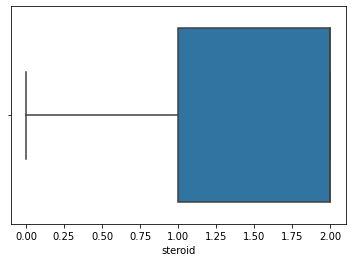

In [ ]:
# using boxplot for outlier detection
sns.boxplot(df['steroid'])

In [ ]:
feature = df.columns

In [ ]:
feature

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

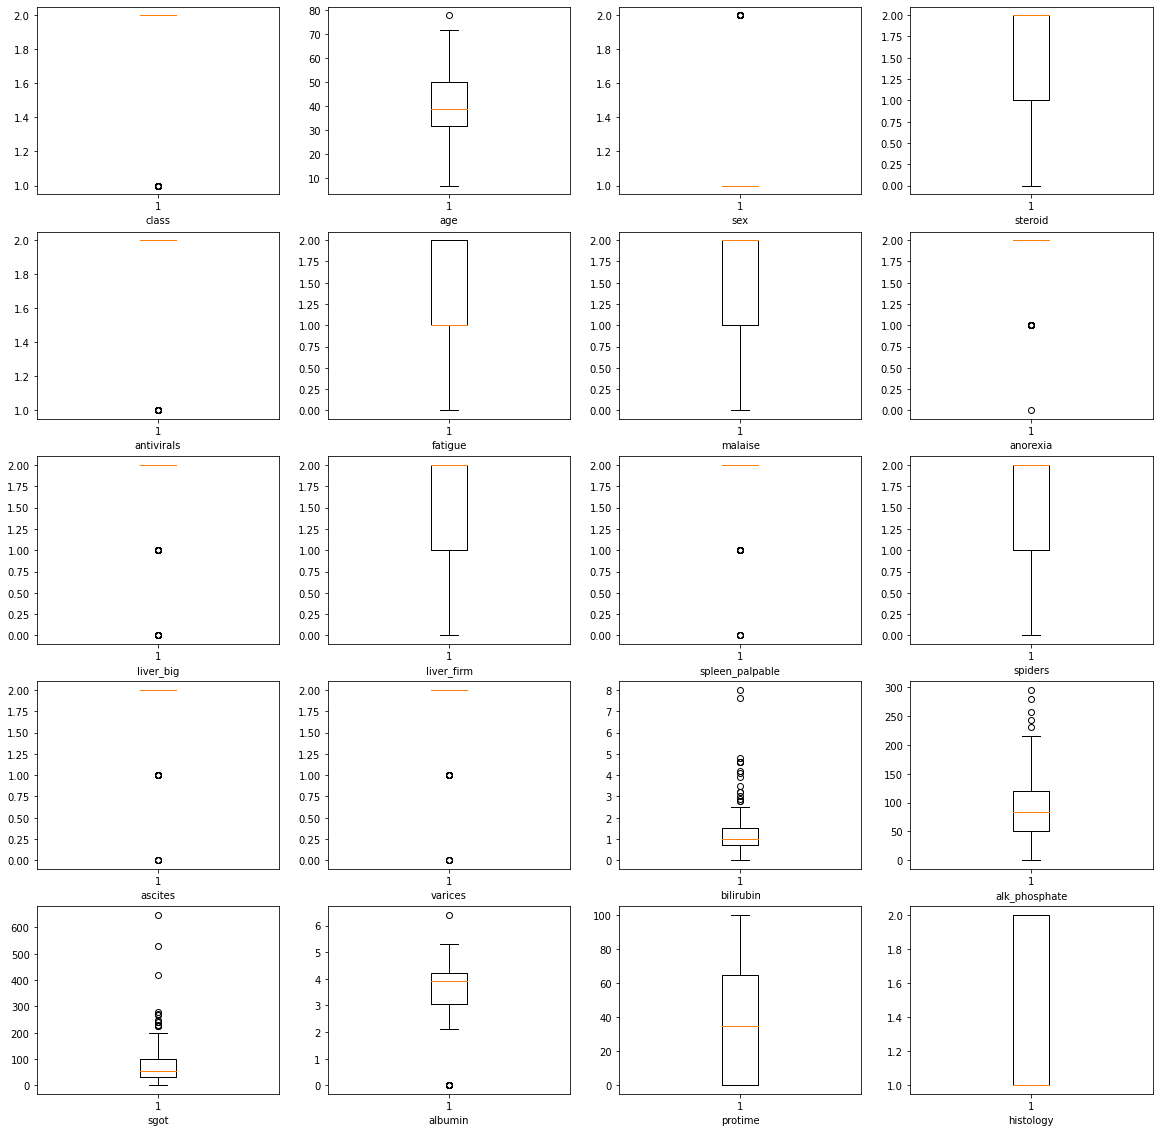

In [ ]:
plt.figure(figsize=(20,20))
for i , var in enumerate(feature):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[var])
    plt.xlabel(feature[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


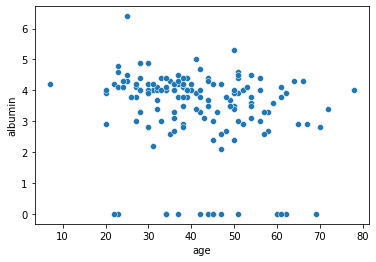

In [ ]:
# Scatterplot
sns.scatterplot(df['age'],df['albumin'])

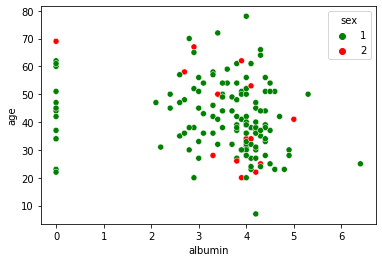

In [ ]:
# Scatter plot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'], palette=['green','red'],data=df)

# Using Interquartile Range(IQR)

H-Spread/Mid_spread

Measures the statistical dispersion/spread

IQR = Quantile 3(75) - Quantile 1(25)

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [ ]:
IQR = q3 - q1

In [ ]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [ ]:
### Get the actual datapoint that is an outlier
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [ ]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [ ]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


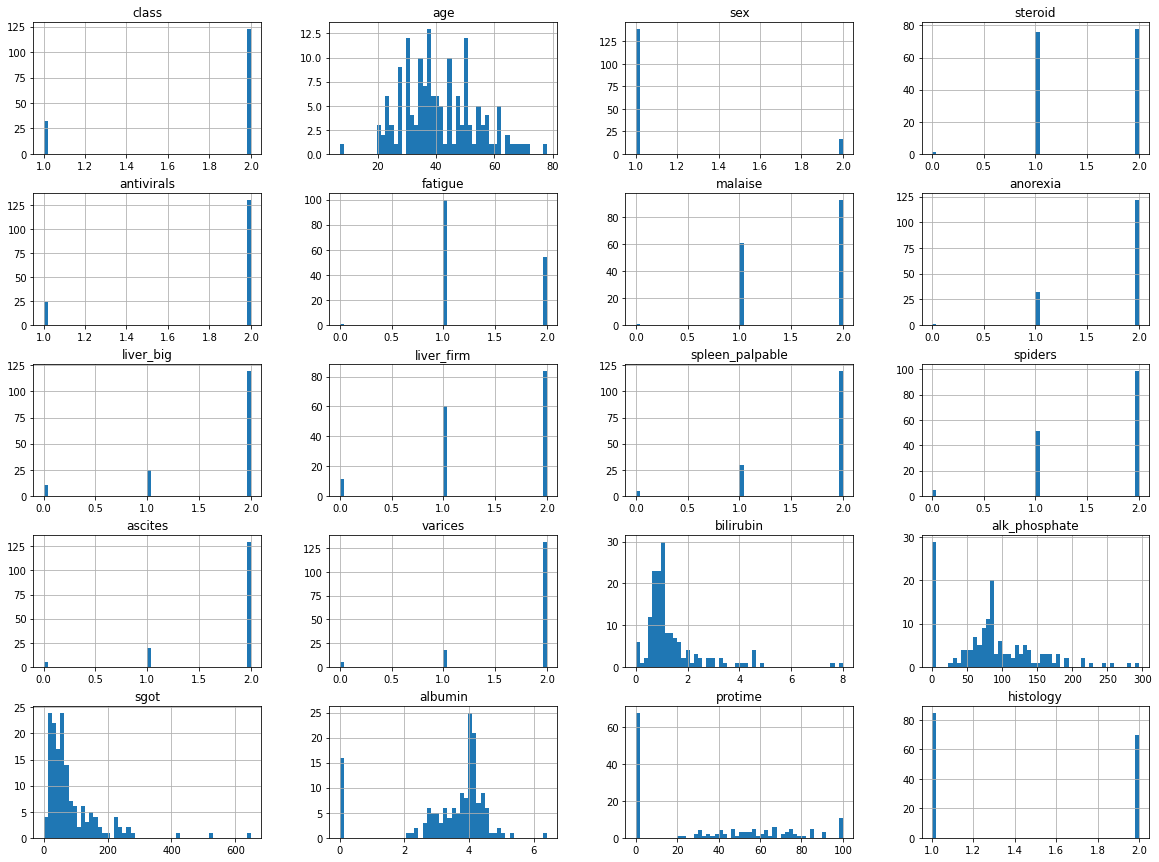

In [ ]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

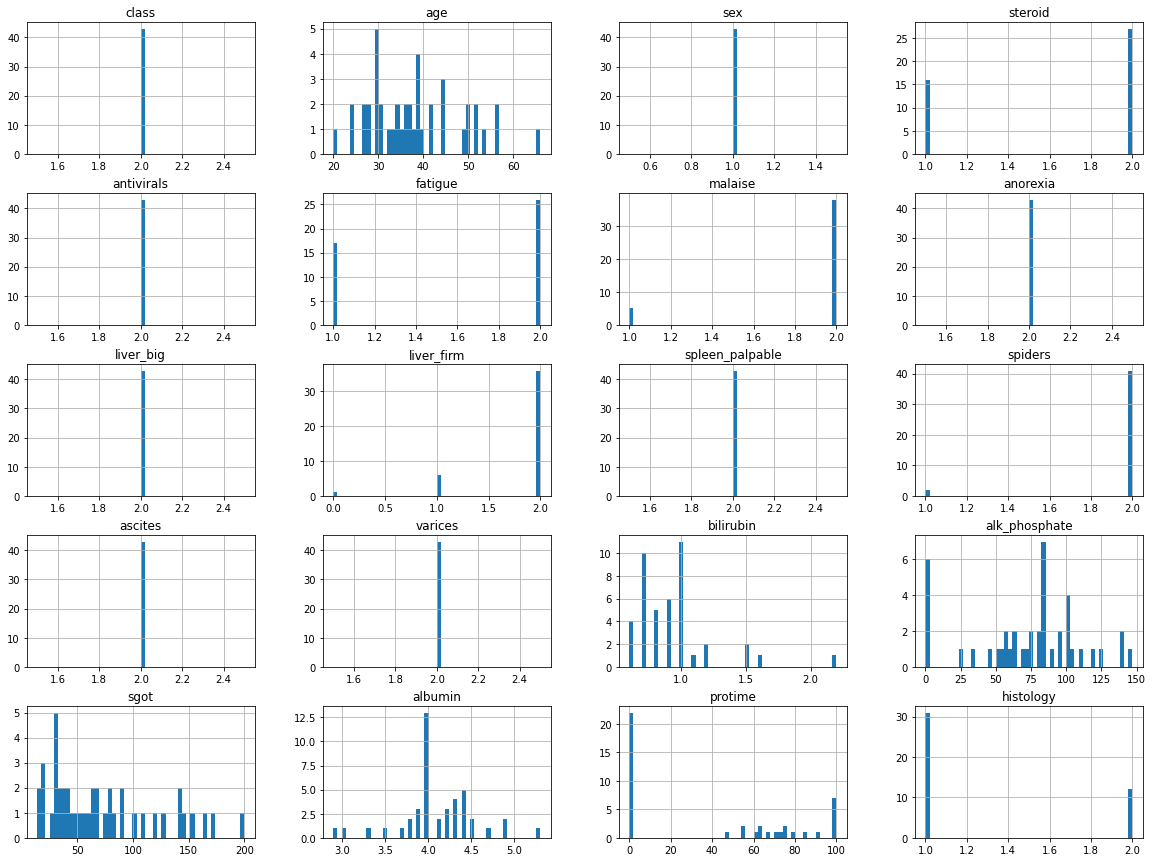

In [ ]:
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

# Feature Selection and Importance
SelectKbest

Strong relation with the output/target

Recursive Feature Elimination


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [ ]:
# Features and Labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [ ]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [ ]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [ ]:
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [ ]:
#Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [ ]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [ ]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [ ]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [ ]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [ ]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [ ]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [ ]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression()

In [ ]:
rfe = RFE(logit,8)

In [ ]:
rfe_fit = rfe.fit(xfeatures,ylabels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [ ]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)

In [ ]:
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


# Checking for Feature Importance
ExtraTreeClassifier

Which feature is important

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Print Important
print(et_clf.feature_importances_)

[0.05316299 0.0214606  0.02755558 0.00911434 0.03209631 0.05422189
 0.02911504 0.04335074 0.04827187 0.03941608 0.06352606 0.09110424
 0.05205884 0.09939521 0.07249495 0.05871364 0.07204039 0.06558198
 0.06731925]


In [ ]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [ ]:
feature_imporance_df

age                0.053163
sex                0.021461
steroid            0.027556
antivirals         0.009114
fatigue            0.032096
malaise            0.054222
anorexia           0.029115
liver_big          0.043351
liver_firm         0.048272
spleen_palpable    0.039416
spiders            0.063526
ascites            0.091104
varices            0.052059
bilirubin          0.099395
alk_phosphate      0.072495
sgot               0.058714
albumin            0.072040
protime            0.065582
histology          0.067319
dtype: float64

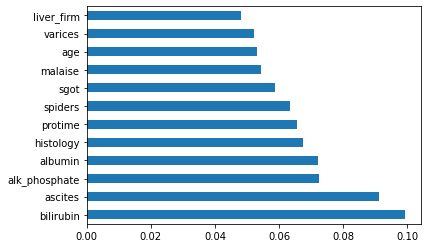

In [ ]:
feature_imporance_df.nlargest(12).plot(kind='barh')


## Model Building
Feature & Labels

Train/Test/Split

LogisticRegression

RF 

DCT

Serialize 


In [ ]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [ ]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [ ]:
# train /test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=7)

In [ ]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.score(x_test,y_test)

0.723404255319149

In [ ]:
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [ ]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [ ]:
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b,y_test_b)

0.723404255319149

In [ ]:
### Single Prediction
x_test.iloc[1]


age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [ ]:
res_dic = {"Die":1,"Live":2}
x1 = x_test.iloc[1]

In [ ]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2])

# Alternative Algorithms

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Model Accuracy Score
clf.score(x_test_b,y_test_b)

0.7659574468085106

In [ ]:
y_pred_dc = clf.predict(x_test_b)

In [ ]:
confusion_matrix(y_test_b,y_pred_dc)

array([[ 6,  7],
       [ 4, 30]])

In [ ]:
print(classification_report(y_test_b,y_pred_dc))

              precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.81      0.88      0.85        34

    accuracy                           0.77        47
   macro avg       0.71      0.67      0.68        47
weighted avg       0.75      0.77      0.76        47



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Model Accuracy Score
knn.score(x_test_b,y_test_b)

0.7446808510638298

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = knn.predict(x_test_b)

In [ ]:
confusion_matrix(y_test_b,y_pred)

array([[ 2, 11],
       [ 1, 33]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_b,y_pred))


              precision    recall  f1-score   support

           1       0.67      0.15      0.25        13
           2       0.75      0.97      0.85        34

    accuracy                           0.74        47
   macro avg       0.71      0.56      0.55        47
weighted avg       0.73      0.74      0.68        47



# SVR

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
clf.fit(x_train_b,y_train_b)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(x_test_b)

In [ ]:
clf.score(x_test_b,y_test_b)

0.723404255319149

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(x_train_b,y_train_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test_b)

In [ ]:
confusion_matrix(y_test_b,y_pred_rf)

array([[ 4,  9],
       [ 1, 33]])

In [ ]:
print(classification_report(y_test_b,y_pred_rf))

              precision    recall  f1-score   support

           1       0.80      0.31      0.44        13
           2       0.79      0.97      0.87        34

    accuracy                           0.79        47
   macro avg       0.79      0.64      0.66        47
weighted avg       0.79      0.79      0.75        47



In [ ]:
rf.score(x_test_b,y_test_b)

0.7872340425531915

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train_b,y_train_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb.predict(x_test_b)

In [ ]:
confusion_matrix(y_test_b,y_pred_xgb)

array([[ 5,  8],
       [ 3, 31]])

In [ ]:
xgb.score(x_test_b,y_test_b)

0.7659574468085106

#NOW TUNING RANDOM FOREST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(x_train_b,y_train_b)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_random.best_score_

0.8611111111111112

In [ ]:
rf_randomised = RandomForestClassifier(bootstrap =True,
 max_depth=100,
 max_features= 'auto',
 min_samples_leaf= 1 ,
 min_samples_split = 2,
 n_estimators = 800)

In [ ]:
rf_randomised.fit(x_train_b,y_train_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred_r = rf_randomised.predict(x_test_b)

In [ ]:
rf_randomised.score(x_test_b,y_test_b)

0.8297872340425532

In [ ]:
confusion_matrix(y_test_b,rf_pred_r)

array([[ 5,  8],
       [ 0, 34]])

In [ ]:
print(classification_report(y_test_b,rf_pred_r)) 

              precision    recall  f1-score   support

           1       1.00      0.38      0.56        13
           2       0.81      1.00      0.89        34

    accuracy                           0.83        47
   macro avg       0.90      0.69      0.73        47
weighted avg       0.86      0.83      0.80        47

